# Table Booking and Online Delivery Analysis


## Dataset Loading
We load the dataset and inspect its structure to understand the available data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/ganes/Downloads/rayuduintern/Dataset .csv'
df = pd.read_csv(file_path)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Data Preprocessing

In [3]:
df = df.dropna(subset=['Has Table booking', 'Has Online delivery', 'Aggregate rating', 'Price range'])
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Table Booking Analysis
Percentage of restaurants that offer table booking.

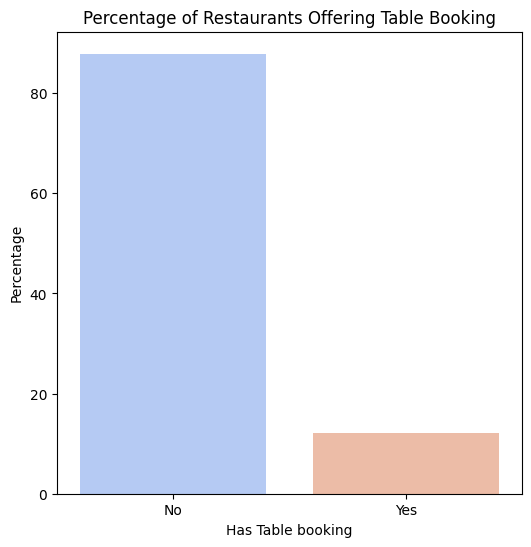

In [4]:
table_booking_counts = df['Has Table booking'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette='coolwarm')
plt.title('Percentage of Restaurants Offering Table Booking')
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Percentage')
plt.show()

## Online Delivery Analysis
Percentage of restaurants that offer online delivery.

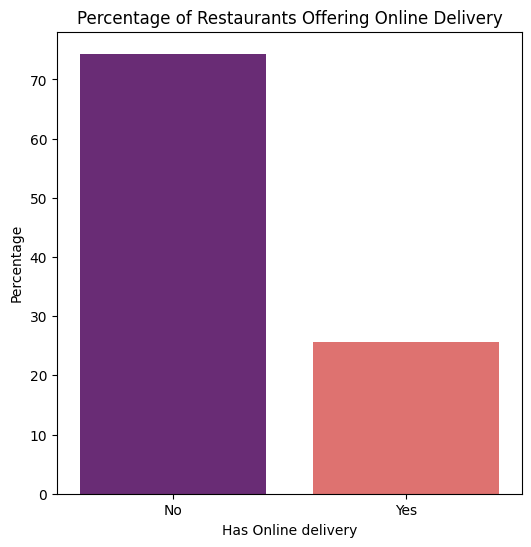

In [5]:
online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
sns.barplot(x=online_delivery_counts.index, y=online_delivery_counts.values, palette='magma')
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Percentage')
plt.show()

## Comparison of Ratings
Comparing the average ratings of restaurants that offer table booking and those that do not.

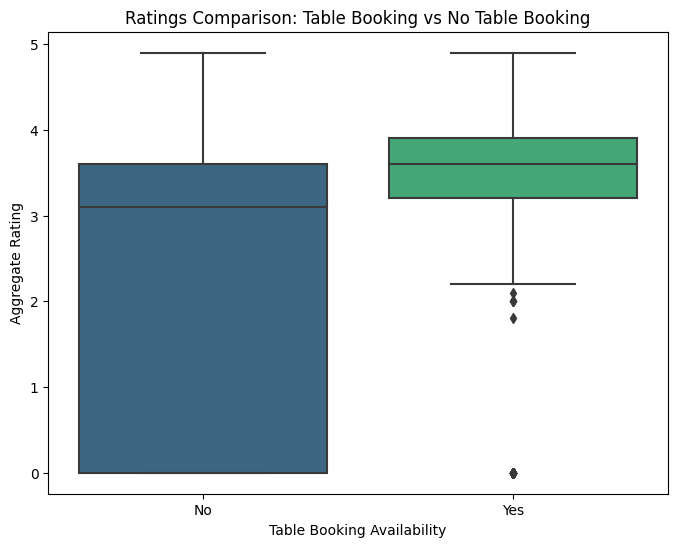

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Has Table booking'], y=df['Aggregate rating'], palette='viridis')
plt.title('Ratings Comparison: Table Booking vs No Table Booking')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Table Booking Availability')
plt.ylabel('Aggregate Rating')
plt.show()

##  Online Delivery vs Price Range
Analyzing the availability of online delivery across different price ranges.

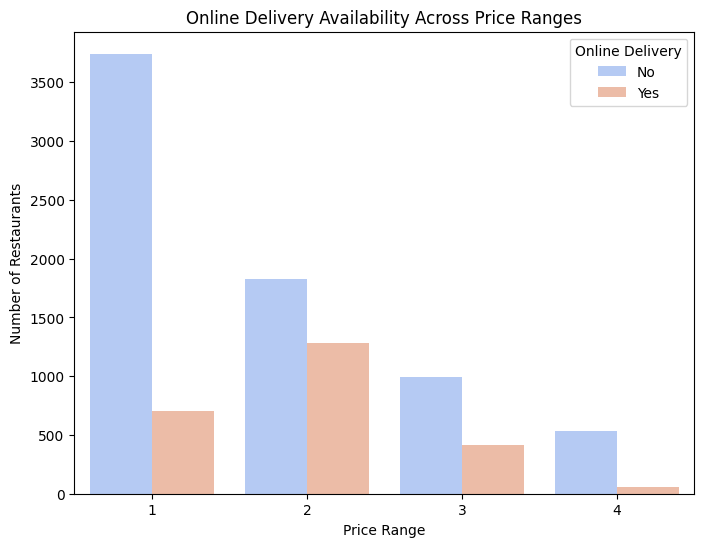

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Price range'], hue=df['Has Online delivery'], palette='coolwarm')
plt.title('Online Delivery Availability Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Delivery', labels=['No', 'Yes'])
plt.show()

##  Additional Insights
Exploring the correlation between online delivery, table booking, and ratings.

C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


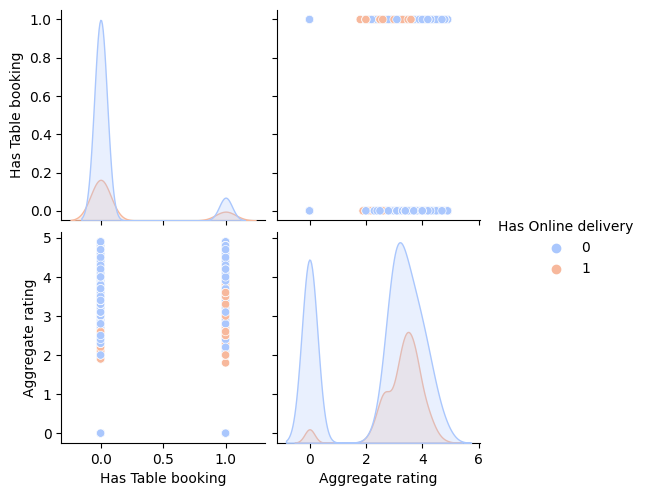

In [8]:
sns.pairplot(df[['Has Table booking', 'Has Online delivery', 'Aggregate rating']], hue='Has Online delivery', palette='coolwarm')
plt.show()